In [1]:
%load_ext autoreload
%autoreload 2

# Working with IMAS files

This example shows how *duqtools* can be used to manipulate IMAS data using `ImasHandle` and `IDSMapping`.

## Copying data

This example shows how *duqtools* can be used to copy data.

In [2]:
from duqtools.api import ImasHandle

First, we construct and Imas handle, consisting of the user name, database (sometimes referred to as machine name), shot and run number. Together these form an Imas path that point to some data on the system.

We can print the path, and check that the data exists.

Note that the user is optional. Duqtools will fill in the current user by default.

In [3]:
handle = ImasHandle(user='g2ssmee', db='jet', shot=94875, run=8000)
print(handle.path())
handle.exists()

/afs/eufus.eu/user/g/g2ssmee/public/imasdb/jet/3/0/ids_948758000.datafile


True

Let's say we want to make a copy of this data set to modify. We should construct a new Imas handle to specify the target location. In the next cell, we create the Imas handle from a string instead. Again, the user is optional, so the string `'jet/94875/8888'` would give the same result.

In [4]:
target = ImasHandle.from_string('g2ssmee/jet/94785/8888')
print(target.path())
target.exists()

/afs/eufus.eu/user/g/g2ssmee/public/imasdb/jet/3/0/ids_947858888.datafile


True

The template data can be copied to the new location.

In [5]:
handle.copy_data_to(target)
target.exists()

- Copy ids from template to : g2ssmee/jet/94785/8888
INFO:screen:- Copy ids from template to : g2ssmee/jet/94785/8888


True

If you are unhappy with the outcome, wecan delete the data using the `ImasHandle.delete()` method. Let's not do that for now.

In [6]:
# target.delete()
target.exists()

True

## Local IMAS databases

Duqtools is compatible with local imas databases, so you can specify the path to your imasdb directly:

In [7]:
handle = ImasHandle(user='/afs/eufus.eu/user/g/g2ssmee/public/imasdb', db='jet', shot=94875, run=8000)
print(handle.path())
handle.exists()

/afs/eufus.eu/user/g/g2ssmee/public/imasdb/jet/3/0/ids_948758000.datafile


True

## Exploring, modifying, and saving data

We developed *duqtools* to make it as straightforward as possible to manipulate IDSs. In this section, we show an example of how one may go about doing so.

Let's say we want to look at 'core_profiles' > 'profiles_1d' > 't_i_average'.

First, we retrieve the 'core_profiles' IDS.

In [8]:
cp = target.get('core_profiles')
cp

IDSMapping(
  profiles_1d = ...
  vacuum_toroidal_field = ...
  time = ...
)

*Duqtools* wraps the IMAS database in a dict-like object, so that the different datasets can be accessed like a dict.

In [9]:
cp['profiles_1d/0/t_i_average']

array([10873.96082052, 10872.03673416, 10867.81168627, 10857.14694854,
       10839.70936357, 10810.41005674, 10768.73609831, 10717.18121687,
       10656.83014146, 10587.90629975, 10510.8825408 , 10426.32395967,
       10334.37851785, 10235.50941984, 10129.89201314, 10017.95409844,
        9899.86968924,  9776.03781595,  9646.63883809,  9512.05793477,
        9372.48695856,  9228.30672488,  9079.79858345,  8927.2307248 ,
        8771.001231  ,  8611.41002345,  8448.74656226,  8283.47218662,
        8115.83427092,  7946.37952659,  7775.362634  ,  7603.26181556,
        7430.46655014,  7257.31070955,  7084.25627928,  6911.64950335,
        6739.84399765,  6569.20529548,  6399.99075788,  6232.39309061,
        6067.04216858,  5904.90863603,  5746.40291772,  5591.66680358,
        5440.56835546,  5293.2622794 ,  5151.00788034,  5013.84737283,
        4880.92735065,  4752.21217566,  4627.47418283,  4506.80740179,
        4390.03306972,  4276.68716968,  4167.13381318,  4061.02844256,
      

In [10]:
cp['profiles_1d/0/t_i_average'] *= 1.1

Once we changed the data, we can sync the changes back to the data file.

In [11]:
cp.sync(target)

## Plotting data

The example below shows how can plot some data using [matplotlib](https://matplotlib.org).

Text(0, 0.5, 't_i_average')

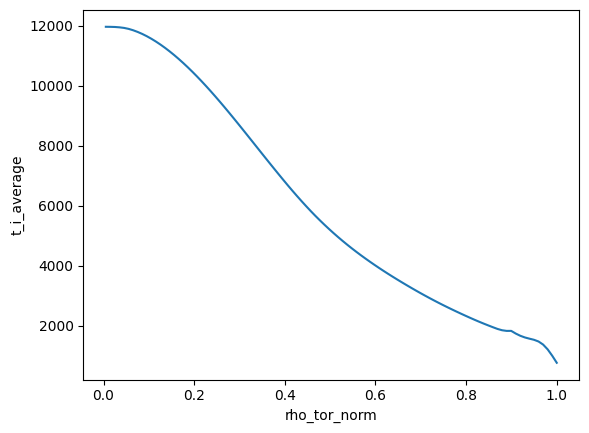

In [12]:
x = cp['profiles_1d/0/grid/rho_tor_norm']
y = cp['profiles_1d/0/t_i_average']

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_xlabel('rho_tor_norm')
ax.set_ylabel('t_i_average')